# Text in a Dataframe

**Introduction**

In the information age, understanding customer sentiment can be a crucial factor in the success of any business.

Yelp, a popular platform for business reviews, is a treasure trove of such information. Reviews on Yelp can significantly influence customer behavior, so analyzing the language used in reviews can provide valuable insights into customer experience, service quality, and much more.

However, the sheer volume of text data can be overwhelming.
The following lessons will explore various text analytics techniques to compare and contrast 5-star and 1-star Yelp reviews. We will focus on preprocessing text data with Pandas and SpaCy and using the Natural Language Toolkit (NLTK) for text analytics.

We will use this dataset throughout the remaining lessons. The goal of this lesson is to separate reviews into different categories based on star ratings for comparative analysis.


**insert links for yelp data**

### Prepare the Data

In [1]:
# Imports
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
# Custom functions
def batch_preprocess_texts(
    texts,
    nlp=None,
    remove_stopwords=True,
    remove_punct=True,
    use_lemmas=False,
    disable=["ner"],
    batch_size=50,
    n_process=-1,
):
    """Efficiently preprocess a collection of texts using nlp.pipe()

    Args:
        texts (collection of strings): collection of texts to process (e.g. df['text'])
        nlp (spacy pipe), optional): Spacy nlp pipe. Defaults to None; if None, it creates a default 'en_core_web_sm' pipe.
        remove_stopwords (bool, optional): Controls stopword removal. Defaults to True.
        remove_punct (bool, optional): Controls punctuation removal. Defaults to True.
        use_lemmas (bool, optional): lemmatize tokens. Defaults to False.
        disable (list of strings, optional): named pipeline elements to disable. Defaults to ["ner"]: Used with nlp.pipe(disable=disable)
        batch_size (int, optional): Number of texts to process in a batch. Defaults to 50.
        n_process (int, optional): Number of CPU processors to use. Defaults to -1 (meaning all CPU cores).

    Returns:
        list of tokens
    """
    # from tqdm.notebook import tqdm
    from tqdm import tqdm

    if nlp is None:
        nlp = spacy.load("en_core_web_sm")

    processed_texts = []

    for doc in tqdm(nlp.pipe(texts, disable=disable, batch_size=batch_size, n_process=n_process)):
        tokens = []
        for token in doc:
            # Check if should remove stopwords and if token is stopword
            if (remove_stopwords == True) and (token.is_stop == True):
                # Continue the loop with the next token
                continue

            # Check if should remove stopwords and if token is stopword
            if (remove_punct == True) and (token.is_punct == True):
                continue

            # Check if should remove stopwords and if token is stopword
            if (remove_punct == True) and (token.is_space == True):
                continue

            
            ## Determine final form of output list of tokens/lemmas
            if use_lemmas:
                tokens.append(token.lemma_.lower())
            else:
                tokens.append(token.text.lower())

        processed_texts.append(tokens)
    return processed_texts

In [6]:
# Load data
# Load data
df_businesses = pd.read_csv("Data/yelp-business-metadata.csv.gz", index_col='business_id')
df_businesses.head()

,name,address,city,state,postal_code,latitude,longitude,stars,review_count,categories
business_id,,,,,,,,,,
Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,"Doctors, Traditional Chinese Medicine, Naturop..."
mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,"Shipping Centers, Local Services, Notaries, Ma..."
tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,"Department Stores, Shopping, Fashion, Home & G..."
MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,"Restaurants, Food, Bubble Tea, Coffee & Tea, B..."
mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,"Brewpubs, Breweries, Food"


In [7]:
# Load in the reviews for CA 2015-2018
df = pd.read_csv('Data/yelp-reviews-CA-2015-2018.csv.gz', index_col='review_id')
df.head()

,business_id,date,text,stars,language
review_id,,,,,
8W3g9ykr8aGGZMMdVbNPKA,gGaF0TtGRx1QOFe0EzuZLg,2015-01-01 00:01:02,Lynn and Montecito flowers are simply the best...,5,en
q10HcbeBRtcvsN7WC02fFw,2CqQ3Tnvj7h0rw84WEEjMw,2015-01-01 00:15:12,Love this place! Always loved the food as they...,5,en
dXOY5UqXhcCQ6f9S-kRc2w,lOa1BVmTcbPpu05h3OPAQA,2015-01-01 00:19:36,We stayed here last weekend with our dog. Its ...,5,en
8mWVoTXecEkRXTvPONYFuw,QFh-h_OZ5Io-mBk32HN28A,2015-01-01 00:20:23,Came here for a quick bite and got the thai sa...,2,en
Xr5KEchLr-jvQiAZm1mtNA,cAbdvzqtFLaAAMFIyPf2AA,2015-01-01 00:47:19,Finally was able to try lunch at Holdren's. M...,2,en


When working with text data, seeing more of the text column in the preview can be helpful. With the current settings, we can only see a snippet of the text in the text column. Let's check the current maximum column width by checking display.max_colwidth.

In [8]:
# New pandas option to change: 
pd.get_option('display.max_colwidth')

50

In [9]:
# Increase column width
pd.set_option('display.max_colwidth', 250)
df.head()

,business_id,date,text,stars,language
review_id,,,,,
8W3g9ykr8aGGZMMdVbNPKA,gGaF0TtGRx1QOFe0EzuZLg,2015-01-01 00:01:02,"Lynn and Montecito flowers are simply the best. Awesome choices, friendly service and great pricing.",5,en
q10HcbeBRtcvsN7WC02fFw,2CqQ3Tnvj7h0rw84WEEjMw,2015-01-01 00:15:12,"Love this place! Always loved the food as they truly due have Killer BBQ. From pulled pork sandwiches to tri-tip the food is always a win. Now with the new location with the huge dog friendly patio, I think I just found my new favorite spot to wa...",5,en
dXOY5UqXhcCQ6f9S-kRc2w,lOa1BVmTcbPpu05h3OPAQA,2015-01-01 00:19:36,We stayed here last weekend with our dog. Its a motel style but the inside is a four star hotel. No kidding! The fireplace adds a nice touch. One block from the beach. Front desk is really nice. Could not ask for a better location. Of course this...,5,en
8mWVoTXecEkRXTvPONYFuw,QFh-h_OZ5Io-mBk32HN28A,2015-01-01 00:20:23,Came here for a quick bite and got the thai salad and a bowl of white bean chicken soup. The salad was pretty basic and the soup was lukewarm. We went around noon and most of the tables had dirty dishes from the previous customers. I asked one o...,2,en
Xr5KEchLr-jvQiAZm1mtNA,cAbdvzqtFLaAAMFIyPf2AA,2015-01-01 00:47:19,"Finally was able to try lunch at Holdren's. My husband ordered the Kobe Burger (medium), and I ordered the Pastrami Melt/Caesar salad. The $18 Kobe Burger came to the table overcooked (well), and very dry. Fries weren't hot or crispy. On top o...",2,en


**Filtering for a Specific Business**

We've been asked to analyze the review for the business named "Sandbar" located in Santa Barbara, CA.

We need to check the business metadata to find the business_id for this establishment.

We will then filter the reviews using the correct business id.

In [10]:
# Filter using city
filter_city = df_businesses['city'].str.contains('Santa Barbara') 
filter_city.sum()

3836

There are 3836 businesses in Santa Barbara included in the metadata.

In [12]:
# Filter using name
filter_name =  df_businesses['name'].str.contains("Sandbar")
filter_name.sum()

8

There are eight businesses with "Sandbar" in the name.

We will combine these filters to obtain businesses with "Sandbar" located in Santa Barbara.

In [13]:
# Find the target business
selected_business =df_businesses.loc[ filter_name & filter_city]
selected_business

,name,address,city,state,postal_code,latitude,longitude,stars,review_count,categories
business_id,,,,,,,,,,
EtM079Cj7-B3G7jPsGYb_Q,Sandbar,514 State St,Santa Barbara,CA,93101,34.417371,-119.695827,3.5,1546,"Nightlife, Arts & Entertainment, Restaurants, Dance Clubs, Bars, Music Venues, Mexican, Sports Bars"


We will now define the business_id. We will need the business_id to filter the reviews.

In [14]:
# Save the business id for slicing the reviews
business_id = selected_business.index[0]
business_id

'EtM079Cj7-B3G7jPsGYb_Q'

Now, we can filter to keep reviews for this business alone.

In [15]:
# Keep reviews for the selected business
reviews = df.loc[ df['business_id']==business_id]
reviews

,business_id,date,text,stars,language
review_id,,,,,
laTog6hwC5yAIWemC_jHfA,EtM079Cj7-B3G7jPsGYb_Q,2015-01-31 12:15:07,Awesome Mexican spot! The outdoor patio at night is live and full of action. Good music and great lighting with plenty of people having a great time. I do not remember what we ordered here because it was a few months ago but it was good and I kno...,4,en
78BMrY9uWMnqo34zYj9B6g,EtM079Cj7-B3G7jPsGYb_Q,2015-02-27 04:10:53,"We randomly popped into the Sandbar after spending the morning shopping in Santa Barbara and we were completely blown away! Let's start with the staff - each person with whom we had contact was happy to be there, engaging, and friendly. What a ...",5,en
DwVApGXXWAPBVCO6LtMG8Q,EtM079Cj7-B3G7jPsGYb_Q,2015-02-27 20:31:45,This place has really turned itself around over the years. I just noticed my bad review from 2009 and felt I should update now that the place is run completely differently. The food is now excellent and the staff courteous.,5,en
J64FTyafTlA5Ct4LwHYg2g,EtM079Cj7-B3G7jPsGYb_Q,2015-02-28 04:28:55,"Was pretty disappointed. Went on the opening night of there remodel, had a good time. Then went back the next night with a group of friends. They would not except my out of state ID can you believe that!! In Santa Barbara a ""tourist town"". I Had ...",1,en
ey05cLREtcvj2dxtJFWeFw,EtM079Cj7-B3G7jPsGYb_Q,2015-02-28 21:05:22,Not bad for the price or location. The sauces weren't that good or flavorful. My friend got the mole and it looked pretty awful. She actually scraped the sauce off. They did have a decent selection of vegetarian options though.,3,en
...,...,...,...,...,...
Y2fAC-48ze0q5P-uMbTbEg,EtM079Cj7-B3G7jPsGYb_Q,2018-12-25 22:04:08,"Hands down the best steak fajitas this native Angelena has ever had. Fun vibe, cozy, and delicious salsa. Would love to come back for happy hour next time I'm in Santa Barbara!",5,en
1n_mhEnQNnnGdYJvPJgXhw,EtM079Cj7-B3G7jPsGYb_Q,2018-12-27 01:58:23,"Came here on Christmas Day (thank god they were open). Ordered the Carne Asada and Grilled Relleno . The steak was over cooked (outer pieces), but taste decent, chili with cheese was okay, and portion was small. \n\nThe service was super duper sl...",3,en
LJcDXfNjLYsMEa99z6A_QQ,EtM079Cj7-B3G7jPsGYb_Q,2018-12-29 01:54:25,Happy hour menu and prices are great! Service is awesome. Allows small dogs. Food portions are pretty big. Left stuffed and happy.,5,en


There are 603 reviews for the selected business.

Let's take a look at the first one.

In [16]:
# View a sample review
sample_review = reviews.iloc[0]
sample_review['text']

'Awesome Mexican spot! The outdoor patio at night is live and full of action. Good music and great lighting with plenty of people having a great time. I do not remember what we ordered here because it was a few months ago but it was good and I know we would go back next time we are in town!'

### Defining the Groups

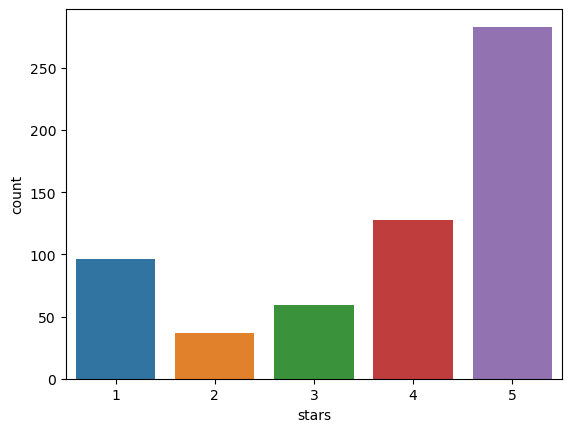

In [17]:
# How many of each star rating?
sns.countplot(data = reviews, x = 'stars');

We are interested in comparing the lowest and highest reviews. We will limit our data to reviews with 1 or 5 stars.

In [18]:
# Limit data to only 1 and 5 star reviews
reviews = reviews[reviews['stars'].isin([1,5])]
reviews

,business_id,date,text,stars,language
review_id,,,,,
78BMrY9uWMnqo34zYj9B6g,EtM079Cj7-B3G7jPsGYb_Q,2015-02-27 04:10:53,"We randomly popped into the Sandbar after spending the morning shopping in Santa Barbara and we were completely blown away! Let's start with the staff - each person with whom we had contact was happy to be there, engaging, and friendly. What a ...",5,en
DwVApGXXWAPBVCO6LtMG8Q,EtM079Cj7-B3G7jPsGYb_Q,2015-02-27 20:31:45,This place has really turned itself around over the years. I just noticed my bad review from 2009 and felt I should update now that the place is run completely differently. The food is now excellent and the staff courteous.,5,en
J64FTyafTlA5Ct4LwHYg2g,EtM079Cj7-B3G7jPsGYb_Q,2015-02-28 04:28:55,"Was pretty disappointed. Went on the opening night of there remodel, had a good time. Then went back the next night with a group of friends. They would not except my out of state ID can you believe that!! In Santa Barbara a ""tourist town"". I Had ...",1,en
5LtZZGB1dCHZswuEu7PFwQ,EtM079Cj7-B3G7jPsGYb_Q,2015-02-28 23:47:01,"Best Mexican grill and bar in Santa Barbara. Our server Lillian was the very best, Will definitely come again. Already planning breakfast tomorrow morning!",5,en
VPWNyhR3DeNfu8cmzPU7HQ,EtM079Cj7-B3G7jPsGYb_Q,2015-03-15 19:55:55,This has to be the worse service. Got seated right away and then sat and waited. No one even acknowledged we were here for a good 15 min. Then another couple was seated near us. They got asked for drinks and food order before we were even acknowl...,1,en
...,...,...,...,...,...
IgCV2QnCQdheaTM8e9Un3w,EtM079Cj7-B3G7jPsGYb_Q,2018-12-18 03:07:20,"Went on 12/13/18 with a group of friends and ordered ""the nachos"". Once we got the nachos mid way through we found about 3 pieces of paper which looked like straw covers. Manager has no empathy to this situation. Absolutely unnecessary and disgus...",1,en
f4xpggDD1X2AQdaG2eqGiw,EtM079Cj7-B3G7jPsGYb_Q,2018-12-24 22:28:57,"This is a really cool place. Santa Barbara has a bunch of nice places to eat and I can definitely recommend that this place is one of them. Our server was super cool, very easy to talk to and took care of everything we ordered. It also was pretty...",5,en
Y2fAC-48ze0q5P-uMbTbEg,EtM079Cj7-B3G7jPsGYb_Q,2018-12-25 22:04:08,"Hands down the best steak fajitas this native Angelena has ever had. Fun vibe, cozy, and delicious salsa. Would love to come back for happy hour next time I'm in Santa Barbara!",5,en


Check the languages column.

In [19]:
# What languages are represented?
reviews['language'].value_counts()

en    378
de      1
Name: language, dtype: int64

We have one non-English review that we will remove from the dataset.

In [20]:
# Limit data to only English
reviews = reviews[reviews['language']=='en']
reviews['language'].value_counts()

en    378
Name: language, dtype: int64

We have 378 reviews. We will determine how many are 1-star versus 5-star using value_counts().

In [21]:
# How many 1 and 5 star reviews?
reviews['stars'].value_counts()

5    282
1     96
Name: stars, dtype: int64

There are 282 5-star reviews and 96 1-star reviews.

Now that we have used the business_id to identify our business and the language column to filter for English, we can drop those columns. We may want to compare changes in review scores over time, so we will keep the date column for now.

In [22]:
# Drop business_id and language
reviews = reviews.drop(columns=['business_id', 'language'])
# Make data a datetime object
reviews['date'] = pd.to_datetime(reviews['date'])
reviews.head()

,date,text,stars
review_id,,,
78BMrY9uWMnqo34zYj9B6g,2015-02-27 04:10:53,"We randomly popped into the Sandbar after spending the morning shopping in Santa Barbara and we were completely blown away! Let's start with the staff - each person with whom we had contact was happy to be there, engaging, and friendly. What a ...",5
DwVApGXXWAPBVCO6LtMG8Q,2015-02-27 20:31:45,This place has really turned itself around over the years. I just noticed my bad review from 2009 and felt I should update now that the place is run completely differently. The food is now excellent and the staff courteous.,5
J64FTyafTlA5Ct4LwHYg2g,2015-02-28 04:28:55,"Was pretty disappointed. Went on the opening night of there remodel, had a good time. Then went back the next night with a group of friends. They would not except my out of state ID can you believe that!! In Santa Barbara a ""tourist town"". I Had ...",1
5LtZZGB1dCHZswuEu7PFwQ,2015-02-28 23:47:01,"Best Mexican grill and bar in Santa Barbara. Our server Lillian was the very best, Will definitely come again. Already planning breakfast tomorrow morning!",5
VPWNyhR3DeNfu8cmzPU7HQ,2015-03-15 19:55:55,This has to be the worse service. Got seated right away and then sat and waited. No one even acknowledged we were here for a good 15 min. Then another couple was seated near us. They got asked for drinks and food order before we were even acknowl...,1


### Preprocessing Pipeline

We will load the nlp pipeline with "parser" and "ner" disabled since we will not need those steps.

In [23]:
import spacy
# Disable parser and ner
nlp_light = spacy.load("en_core_web_sm", disable=['parser','ner'])
# Print active components
nlp_light.pipe_names

['tok2vec', 'tagger', 'attribute_ruler', 'lemmatizer']

Now, we will add a column to the dataframe for the tokens. We will call our custom batch_preprocess_texts function within a lambda function to apply it to each review.

In [24]:
# batch preprocess the text and store tokens
reviews['tokens'] = batch_preprocess_texts(reviews['text'], nlp = nlp_light)
reviews.head()

378it [00:20, 18.30it/s]


,date,text,stars,tokens
review_id,,,,
78BMrY9uWMnqo34zYj9B6g,2015-02-27 04:10:53,"We randomly popped into the Sandbar after spending the morning shopping in Santa Barbara and we were completely blown away! Let's start with the staff - each person with whom we had contact was happy to be there, engaging, and friendly. What a ...",5,"[randomly, popped, sandbar, spending, morning, shopping, santa, barbara, completely, blown, away, let, start, staff, person, contact, happy, engaging, friendly, great, start, experience, ordered, tacos, happier, ordered, grilled, veggie, tacos, s..."
DwVApGXXWAPBVCO6LtMG8Q,2015-02-27 20:31:45,This place has really turned itself around over the years. I just noticed my bad review from 2009 and felt I should update now that the place is run completely differently. The food is now excellent and the staff courteous.,5,"[place, turned, years, noticed, bad, review, 2009, felt, update, place, run, completely, differently, food, excellent, staff, courteous]"
J64FTyafTlA5Ct4LwHYg2g,2015-02-28 04:28:55,"Was pretty disappointed. Went on the opening night of there remodel, had a good time. Then went back the next night with a group of friends. They would not except my out of state ID can you believe that!! In Santa Barbara a ""tourist town"". I Had ...",1,"[pretty, disappointed, went, opening, night, remodel, good, time, went, night, group, friends, state, id, believe, santa, barbara, tourist, town, going, years, issue, az, id, gave, credit, card, california, sales, license, work, license, good, 25..."
5LtZZGB1dCHZswuEu7PFwQ,2015-02-28 23:47:01,"Best Mexican grill and bar in Santa Barbara. Our server Lillian was the very best, Will definitely come again. Already planning breakfast tomorrow morning!",5,"[best, mexican, grill, bar, santa, barbara, server, lillian, best, definitely, come, planning, breakfast, tomorrow, morning]"
VPWNyhR3DeNfu8cmzPU7HQ,2015-03-15 19:55:55,This has to be the worse service. Got seated right away and then sat and waited. No one even acknowledged we were here for a good 15 min. Then another couple was seated near us. They got asked for drinks and food order before we were even acknowl...,1,"[worse, service, got, seated, right, away, sat, waited, acknowledged, good, 15, min, couple, seated, near, got, asked, drinks, food, order, acknowledged, finally, waiter, came, took, order, left, got, chips, finished, waiter, asked, wanted, said,..."


We will also add a column for the lemmas by setting the use_lemmas argument to True when calling the custom function.

In [25]:
# batch preprocess the text and store lemmas
reviews['lemmas'] = batch_preprocess_texts(reviews['text'], nlp = nlp_light, use_lemmas = True)
reviews.head()

378it [00:20, 18.53it/s]


,date,text,stars,tokens,lemmas
review_id,,,,,
78BMrY9uWMnqo34zYj9B6g,2015-02-27 04:10:53,"We randomly popped into the Sandbar after spending the morning shopping in Santa Barbara and we were completely blown away! Let's start with the staff - each person with whom we had contact was happy to be there, engaging, and friendly. What a ...",5,"[randomly, popped, sandbar, spending, morning, shopping, santa, barbara, completely, blown, away, let, start, staff, person, contact, happy, engaging, friendly, great, start, experience, ordered, tacos, happier, ordered, grilled, veggie, tacos, s...","[randomly, pop, sandbar, spend, morning, shopping, santa, barbara, completely, blow, away, let, start, staff, person, contact, happy, engaging, friendly, great, start, experience, order, taco, happy, order, grill, veggie, tacos, spice, cool, ques..."
DwVApGXXWAPBVCO6LtMG8Q,2015-02-27 20:31:45,This place has really turned itself around over the years. I just noticed my bad review from 2009 and felt I should update now that the place is run completely differently. The food is now excellent and the staff courteous.,5,"[place, turned, years, noticed, bad, review, 2009, felt, update, place, run, completely, differently, food, excellent, staff, courteous]","[place, turn, year, notice, bad, review, 2009, feel, update, place, run, completely, differently, food, excellent, staff, courteous]"
J64FTyafTlA5Ct4LwHYg2g,2015-02-28 04:28:55,"Was pretty disappointed. Went on the opening night of there remodel, had a good time. Then went back the next night with a group of friends. They would not except my out of state ID can you believe that!! In Santa Barbara a ""tourist town"". I Had ...",1,"[pretty, disappointed, went, opening, night, remodel, good, time, went, night, group, friends, state, id, believe, santa, barbara, tourist, town, going, years, issue, az, id, gave, credit, card, california, sales, license, work, license, good, 25...","[pretty, disappointed, go, opening, night, remodel, good, time, go, night, group, friend, state, id, believe, santa, barbara, tourist, town, go, year, issue, az, id, give, credit, card, california, sale, license, work, license, good, 25yr, old, r..."
5LtZZGB1dCHZswuEu7PFwQ,2015-02-28 23:47:01,"Best Mexican grill and bar in Santa Barbara. Our server Lillian was the very best, Will definitely come again. Already planning breakfast tomorrow morning!",5,"[best, mexican, grill, bar, santa, barbara, server, lillian, best, definitely, come, planning, breakfast, tomorrow, morning]","[well, mexican, grill, bar, santa, barbara, server, lillian, good, definitely, come, plan, breakfast, tomorrow, morning]"
VPWNyhR3DeNfu8cmzPU7HQ,2015-03-15 19:55:55,This has to be the worse service. Got seated right away and then sat and waited. No one even acknowledged we were here for a good 15 min. Then another couple was seated near us. They got asked for drinks and food order before we were even acknowl...,1,"[worse, service, got, seated, right, away, sat, waited, acknowledged, good, 15, min, couple, seated, near, got, asked, drinks, food, order, acknowledged, finally, waiter, came, took, order, left, got, chips, finished, waiter, asked, wanted, said,...","[bad, service, got, seat, right, away, sit, wait, acknowledge, good, 15, min, couple, seat, near, get, ask, drink, food, order, acknowledge, finally, waiter, come, take, order, leave, get, chip, finish, waiter, ask, want, say, yes, get, chip, wai..."


Let's preview the tokens for the first review.


In [26]:
# View a sample of tokens
sample_review = reviews.iloc[0]
sample_review['tokens']

['randomly',
 'popped',
 'sandbar',
 'spending',
 'morning',
 'shopping',
 'santa',
 'barbara',
 'completely',
 'blown',
 'away',
 'let',
 'start',
 'staff',
 'person',
 'contact',
 'happy',
 'engaging',
 'friendly',
 'great',
 'start',
 'experience',
 'ordered',
 'tacos',
 'happier',
 'ordered',
 'grilled',
 'veggie',
 'tacos',
 'spice',
 'cooled',
 'queso',
 'fresco',
 'hubby',
 'ordered',
 'chicken',
 'tacos',
 'spicy',
 'veggie',
 'ones',
 'spicy',
 'inhaled',
 'sets',
 'tacos',
 'elevated',
 'level',
 'homemade',
 'tortillas',
 'simply',
 'delicious',
 'authentic']

This appears to be a list. We can confirm.

In [27]:
# confirm data type of tokens
type(sample_review['tokens'])

list

We can also confirm the data type of the lemmas.

In [28]:
# confirm data type of lemmas
type(sample_review['lemmas'])

list

The spaCy preprocessor has created lists of tokens for each review.

We will want the tokens and lemmas available as string objects.

We will use a lambda function to convert these lists to strings with a space between each token or lemma.

In [29]:
# Join list of tokens into a string with spaces between each token
reviews['tokens-joined'] = reviews['tokens'].map(lambda x: " ".join(x))
# Join list of lemmas into a string with spaces between each lemma
reviews['lemmas-joined'] = reviews['lemmas'].map(lambda x: " ".join(x))
reviews.head(3)

,date,text,stars,tokens,lemmas,tokens-joined,lemmas-joined
review_id,,,,,,,
78BMrY9uWMnqo34zYj9B6g,2015-02-27 04:10:53,"We randomly popped into the Sandbar after spending the morning shopping in Santa Barbara and we were completely blown away! Let's start with the staff - each person with whom we had contact was happy to be there, engaging, and friendly. What a ...",5,"[randomly, popped, sandbar, spending, morning, shopping, santa, barbara, completely, blown, away, let, start, staff, person, contact, happy, engaging, friendly, great, start, experience, ordered, tacos, happier, ordered, grilled, veggie, tacos, s...","[randomly, pop, sandbar, spend, morning, shopping, santa, barbara, completely, blow, away, let, start, staff, person, contact, happy, engaging, friendly, great, start, experience, order, taco, happy, order, grill, veggie, tacos, spice, cool, ques...",randomly popped sandbar spending morning shopping santa barbara completely blown away let start staff person contact happy engaging friendly great start experience ordered tacos happier ordered grilled veggie tacos spice cooled queso fresco hubby...,randomly pop sandbar spend morning shopping santa barbara completely blow away let start staff person contact happy engaging friendly great start experience order taco happy order grill veggie tacos spice cool queso fresco hubby order chicken tac...
DwVApGXXWAPBVCO6LtMG8Q,2015-02-27 20:31:45,This place has really turned itself around over the years. I just noticed my bad review from 2009 and felt I should update now that the place is run completely differently. The food is now excellent and the staff courteous.,5,"[place, turned, years, noticed, bad, review, 2009, felt, update, place, run, completely, differently, food, excellent, staff, courteous]","[place, turn, year, notice, bad, review, 2009, feel, update, place, run, completely, differently, food, excellent, staff, courteous]",place turned years noticed bad review 2009 felt update place run completely differently food excellent staff courteous,place turn year notice bad review 2009 feel update place run completely differently food excellent staff courteous
J64FTyafTlA5Ct4LwHYg2g,2015-02-28 04:28:55,"Was pretty disappointed. Went on the opening night of there remodel, had a good time. Then went back the next night with a group of friends. They would not except my out of state ID can you believe that!! In Santa Barbara a ""tourist town"". I Had ...",1,"[pretty, disappointed, went, opening, night, remodel, good, time, went, night, group, friends, state, id, believe, santa, barbara, tourist, town, going, years, issue, az, id, gave, credit, card, california, sales, license, work, license, good, 25...","[pretty, disappointed, go, opening, night, remodel, good, time, go, night, group, friend, state, id, believe, santa, barbara, tourist, town, go, year, issue, az, id, give, credit, card, california, sale, license, work, license, good, 25yr, old, r...",pretty disappointed went opening night remodel good time went night group friends state id believe santa barbara tourist town going years issue az id gave credit card california sales license work license good 25yrs old rejected id lady asked pas...,pretty disappointed go opening night remodel good time go night group friend state id believe santa barbara tourist town go year issue az id give credit card california sale license work license good 25yr old reject id lady ask passport american ...


We can verify that both of the new "joined" columns are strings.

In [30]:
# Define first review as sample
sample_review = reviews.iloc[0]
# confirm data type of tokens-joined
print(type(sample_review['tokens-joined']))
# confirm data type of lemmas-joined
print(type(sample_review['lemmas-joined']))

<class 'str'>
<class 'str'>


We preview an example of the tokens joined into a string for the first review.

In [31]:
# Preview the tokens-joined into a single string
sample_review['tokens-joined']

'randomly popped sandbar spending morning shopping santa barbara completely blown away let start staff person contact happy engaging friendly great start experience ordered tacos happier ordered grilled veggie tacos spice cooled queso fresco hubby ordered chicken tacos spicy veggie ones spicy inhaled sets tacos elevated level homemade tortillas simply delicious authentic'

### Summary

In this lesson, you learned how to create subsets of your data when the text is stored in a dataframe. You also learned how to apply preprocessing to data in dataframes using SpaCy to create tokenized data without punctuation and stopwords, as well as lemmatized data. Finally, you learned how to recombine the lists of tokenized and lemmatized words in each document into one string per document. Keeping multiple forms of your data is useful for different EDA and modeling techniques.